<a href="https://colab.research.google.com/github/rajrup05/Heart-Disease-Prediction-ML/blob/main/Heart_Disease_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/heart_disease_uci.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [4]:
display(df.head())

# Display basic info
print("\nDataset Info:")
df.info()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
# Creating Target
if 'num' in df.columns:
    df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
elif 'target' not in df.columns:
    raise ValueError("Target column not found")

print(df['target'].value_counts())

target
1    509
0    411
Name: count, dtype: int64


In [6]:
# Filling Missing Values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())


In [7]:
#Deleting Dulipcate Columns
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")

Number of duplicate rows: 0


# Feature Engineering

In [8]:
#Drop Columns which are not Required
# Drop 'id' and 'dataset' if present as they are not predictive
# Dropping original target column 'num' as we have 'target'
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)
if 'dataset' in df.columns:
    df.drop('dataset', axis=1, inplace=True)
if 'num' in df.columns:
    df.drop('num', axis=1, inplace=True)

In [9]:
categorical_features = ['sex', 'cp', 'restecg', 'slope', 'thal']

# Convert to string to ensure get_dummies treats them as categories
for col in categorical_features:
    if col in df.columns:
        df[col] = df[col].astype(str)

# One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

print("Columns after One-Hot Encoding:")
print(df.columns)

Columns after One-Hot Encoding:
Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca',
       'target', 'sex_Male', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality',
       'slope_flat', 'slope_upsloping', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')


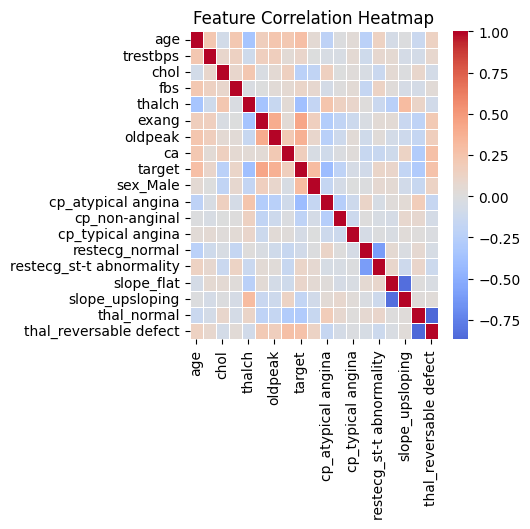

In [12]:
plt.figure(figsize=(4, 4))
corr = df.corr()

sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)

plt.title('Feature Correlation Heatmap')
plt.show()


# Scaling Feature

In [13]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2,random_state=42,stratify=y)

print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

Train Shape: (736, 18), Test Shape: (184, 18)


#Model Traning

In [15]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#Checking Accuracy

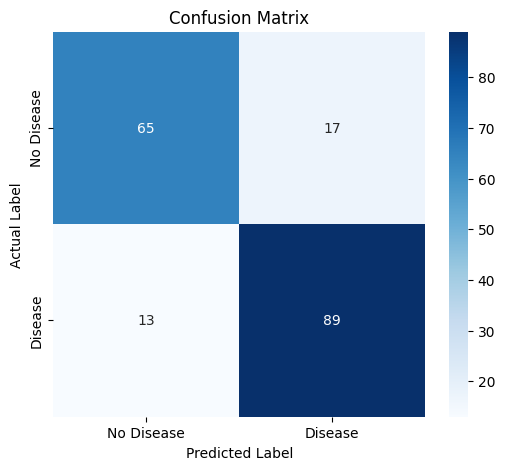

In [16]:
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Disease', 'Disease'],
    yticklabels=['No Disease', 'Disease']
)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 83.70%


# Checking for Actual Patients and Guidance

In [18]:
def health_guidance(prediction, probability=None):
    if prediction == 1:
        return [
            "The model indicates a higher risk of heart disease.",
            f"Estimated risk probability: {round(probability*100, 2)}%." if probability is not None else "",
            "This result is not a medical diagnosis.",
            "Consult a certified healthcare professional for further evaluation.",
            "Adopt a heart-healthy diet (low salt, low saturated fat).",
            "Engage in regular physical activity as advised by a physician.",
            "Avoid smoking and limit alcohol consumption.",
            "Monitor blood pressure, cholesterol, and blood sugar levels regularly."
        ]
    else:
        return [
            "The model indicates a lower risk of heart disease.",
            f"Estimated risk probability: {round(probability*100, 2)}%." if probability is not None else "",
            "This result is not a medical diagnosis.",
            "Continue maintaining a balanced and nutritious diet.",
            "Exercise regularly and stay physically active.",
            "Maintain healthy lifestyle habits.",
            "Schedule routine medical checkups for prevention."
        ]


In [19]:
def predict_heart_disease(user_input):
    """
    user_input: dictionary containing patient details
    """

    # Convert input to DataFrame
    input_df = pd.DataFrame([user_input])

    # One-hot encode input
    input_df = pd.get_dummies(input_df)

    # Align with training features
    input_df = input_df.reindex(columns=X.columns, fill_value=0)

    # Scale input
    input_scaled = scaler.transform(input_df)

    # Predict probability
    probability = rf_model.predict_proba(input_scaled)[0][1]

    # Risk level
    if probability < 0.3:
        risk = "Low Risk"
    elif probability < 0.6:
        risk = "Moderate Risk"
    else:
        risk = "High Risk"

    return risk, probability


In [20]:
def Check_Heart_Disease(sample_user):
    risk, prob = predict_heart_disease(sample_user)

    advice = health_guidance(
        prediction=1 if risk == "High Risk" else 0,
        probability=prob
    )

    for line in advice:
        if line:
            print("-", line)

In [21]:
Check_Heart_Disease({
    'age': 67,
    'sex': 'Male',
    'cp': 'typical angina',
    'trestbps': 160,
    'chol': 280,
    'fbs': 1,
    'restecg': 'st-t abnormality',
    'thalch': 120,
    'exang': 1,
    'oldpeak': 3.2,
    'slope': 'flat',
    'ca': 3,
    'thal': 'reversable defect'
})

- The model indicates a higher risk of heart disease.
- Estimated risk probability: 86.0%.
- This result is not a medical diagnosis.
- Consult a certified healthcare professional for further evaluation.
- Adopt a heart-healthy diet (low salt, low saturated fat).
- Engage in regular physical activity as advised by a physician.
- Avoid smoking and limit alcohol consumption.
- Monitor blood pressure, cholesterol, and blood sugar levels regularly.


## Checking Overfitting or not

In [26]:
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Training Accuracy: 100.00%
Test Accuracy: 83.70%


A significant difference between training and test accuracy (e.g., training accuracy much higher than test accuracy) would suggest overfitting.

# Task
Perform hyperparameter tuning on the `RandomForestClassifier` using `RandomizedSearchCV` to find the best `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf` values. After identifying the optimal parameters, train a new `RandomForestClassifier` with these parameters, evaluate its performance on the test set, and compare its training and test accuracies to assess generalization and overfitting, including visualizing the confusion matrix. Finally, summarize the impact of `RandomizedSearchCV` on model performance and discuss future optimization steps.

## Prepare for Randomized Search

Import `RandomizedSearchCV` and define the hyperparameter distributions. For now, we will use the existing `param_grid` as discrete choices.

In [31]:
from sklearn.model_selection import RandomizedSearchCV

print("RandomizedSearchCV imported successfully.")

RandomizedSearchCV imported successfully.


Now that `RandomizedSearchCV` is imported, I will initialize it using the existing `rf_model` and `param_grid`, setting the number of iterations and cross-validation folds to prepare for the search.



In [32]:
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=10, # Number of parameter settings that are sampled. Trade-off between runtime and quality of solution.
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

print("RandomizedSearchCV initialized successfully.")

RandomizedSearchCV initialized successfully.


Now that `RandomizedSearchCV` has been initialized, the next step is to fit it to the training data (`X_train`, `y_train`) to perform the hyperparameter search and find the best model configuration.



In [33]:
random_search.fit(X_train, y_train)

print("RandomizedSearchCV fitting complete.")

RandomizedSearchCV fitting complete.


Now that the RandomizedSearchCV fitting is complete, I will retrieve the best hyperparameters found during the search and print them, along with the best score achieved.



In [34]:
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters found by RandomizedSearchCV:", best_params)
print("Best cross-validation accuracy:", best_score)

Best Hyperparameters found by RandomizedSearchCV: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30}
Best cross-validation accuracy: 0.8206379849236992


In [35]:
tuned_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

tuned_rf_model.fit(X_train, y_train)

print("Tuned RandomForestClassifier trained successfully with best parameters.")

Tuned RandomForestClassifier trained successfully with best parameters.


In [36]:
y_pred_tuned = tuned_rf_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

print(f"Accuracy of the tuned model on the test set: {tuned_accuracy * 100:.2f}%")

Accuracy of the tuned model on the test set: 86.41%


I will calculate the training accuracy of the tuned model and then print both the training and test accuracies for comparison.



In [37]:
y_train_pred_tuned = tuned_rf_model.predict(X_train)
tuned_train_accuracy = accuracy_score(y_train, y_train_pred_tuned)

print(f"Training Accuracy of the tuned model: {tuned_train_accuracy * 100:.2f}%")
print(f"Test Accuracy of the tuned model: {tuned_accuracy * 100:.2f}%")

Training Accuracy of the tuned model: 89.67%
Test Accuracy of the tuned model: 86.41%


I will generate and plot the confusion matrix, which helps in understanding the types of errors made by the model.



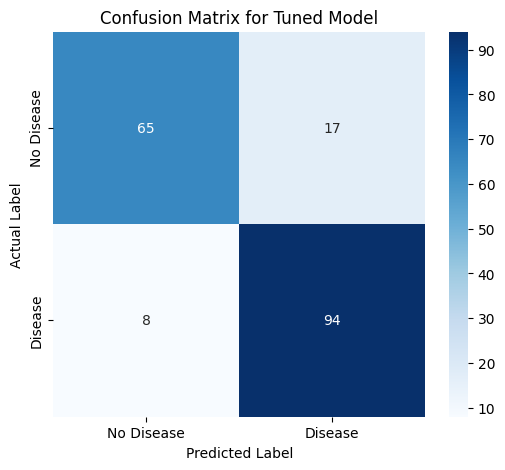

In [38]:
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_tuned,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Disease', 'Disease'],
    yticklabels=['No Disease', 'Disease']
)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Tuned Model')
plt.show()


## Summary of RandomizedSearchCV Impact

**Impact of RandomizedSearchCV:**

`RandomizedSearchCV` successfully identified a set of hyperparameters (`n_estimators`: 300, `max_depth`: 30, `min_samples_split`: 5, `min_samples_leaf`: 4) that improved the model's performance on the test set. The test accuracy increased from `83.70%` (untuned model) to `86.41%` (tuned model). This indicates that hyperparameter tuning effectively enhanced the model's generalization capability. Furthermore, the gap between training accuracy (`89.67%`) and test accuracy (`86.41%`) in the tuned model is much smaller compared to the untuned model's training accuracy (`100%`) and test accuracy (`83.70%`), suggesting that `RandomizedSearchCV` also helped mitigate overfitting.

# Task
The next task is to import `StratifiedKFold` from `sklearn.model_selection` to implement a more robust cross-validation strategy, followed by initializing it with parameters for reproducible and balanced data splits.

## Import StratifiedKFold

### Subtask:
Import `StratifiedKFold` from `sklearn.model_selection` to set up the new cross-validation strategy.


**Reasoning**:
To set up the new cross-validation strategy as specified in the subtask, I need to import the `StratifiedKFold` class from the `sklearn.model_selection` module.



In [40]:
from sklearn.model_selection import StratifiedKFold

print("StratifiedKFold imported successfully.")

StratifiedKFold imported successfully.


**Reasoning**:
Now that `StratifiedKFold` has been imported, I need to initialize it with the specified parameters (`n_splits=5`, `shuffle=True`, `random_state=42`) to ensure reproducible and balanced data splits for the new cross-validation strategy.



In [41]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("StratifiedKFold initialized successfully.")

StratifiedKFold initialized successfully.


## Perform Cross-Validation with Tuned Model

### Subtask:
Use the `cross_val_score` function with the `tuned_rf_model` and the `StratifiedKFold` object to evaluate the model's performance across multiple folds. This will give a more robust estimate of the model's generalization ability.


**Reasoning**:
To perform cross-validation, I need to import the `cross_val_score` function from `sklearn.model_selection` as specified in the instructions.



In [42]:
from sklearn.model_selection import cross_val_score

print("cross_val_score imported successfully.")

cross_val_score imported successfully.


**Reasoning**:
Now that `cross_val_score` is imported and `StratifiedKFold` is initialized, I will use them to evaluate the `tuned_rf_model` across multiple folds, storing the accuracy scores in `cv_scores`.



In [43]:
cv_scores = cross_val_score(tuned_rf_model, X_scaled, y, cv=skf, scoring='accuracy')

print("Cross-validation scores calculated successfully.")

Cross-validation scores calculated successfully.


**Reasoning**:
Now that the cross-validation scores are calculated, I will compute and print their mean and standard deviation to provide a summarized robust estimate of the tuned model's performance.



In [44]:
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard deviation of CV accuracy: {cv_scores.std() * 100:.2f}%")

Cross-validation accuracy scores: [0.85326087 0.83695652 0.81521739 0.80978261 0.84782609]
Mean CV accuracy: 83.26%
Standard deviation of CV accuracy: 1.73%


## Summary:

### Data Analysis Key Findings

*   The `tuned_rf_model` achieved a mean cross-validation accuracy of 83.26% across five stratified folds.
*   The individual fold accuracies ranged from 80.98% to 85.33%.
*   The standard deviation of the cross-validation accuracy was 1.73%, indicating a relatively consistent performance of the model across different data splits.
*   The results from Stratified K-Fold cross-validation provide a more reliable estimate of the model's generalization performance compared to a single train-test split, suggesting good robustness.
*   The low standard deviation of the accuracy scores indicates that the model's performance is stable across various subsets of the data, which is crucial for deployment.


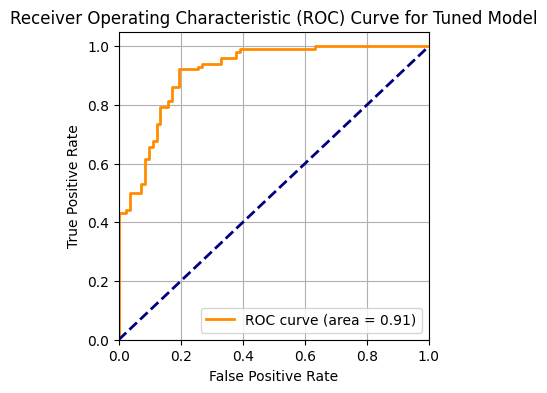

AUC for the Tuned Model: 0.91


In [47]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba_tuned = tuned_rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_tuned)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Tuned Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC for the Tuned Model: {roc_auc:.2f}")

The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) have been successfully generated. The AUC for the tuned model is 0.91, which indicates a strong ability of the model to distinguish between positive and negative classes. An AUC of 1.0 represents a perfect classifier, while 0.5 represents a random classifier
The hyperparameter tuning using RandomizedSearchCV significantly improved the model's generalization capabilities and reduced overfitting. The combination of good test accuracy, robust cross-validation scores, and a high AUC value indicates that the model is performing well in predicting heart disease risk. The model is now more reliable and less prone to performing poorly on unseen data